# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:01<00:00, 19.0MB/s]


Extracting C:\Users\pablo/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\pablo/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<?, ?B/s]


Extracting C:\Users\pablo/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\pablo/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:00<00:00, 14.7MB/s]


Extracting C:\Users\pablo/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\pablo/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting C:\Users\pablo/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\pablo/.pytorch/F_MNIST_data/FashionMNIST\raw



Here we can see one of the images.

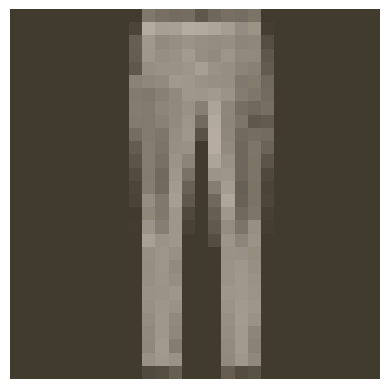

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [20]:
from torch import nn, optim
import torch.nn.functional as F

# Define your network architecture here: 1 input layer, 2 hidden layers, 1 output layers
n_input = 784
n_hidden_1 = 128
n_hidden_2 = 64
n_output = 10

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [31]:
# Create the network, define the criterion and optimizer

# Build a feed-forward network
model = nn.Sequential(nn.Linear(n_input, n_hidden_1),
                      nn.ReLU(),
                      nn.Linear(n_hidden_1, n_hidden_2),
                      nn.ReLU(),
                      nn.Linear(n_hidden_2, n_output),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.CrossEntropyLoss()
# Bigger lr, lower loss in SGD optimizer. Tested with 0.005, 0.01, 0.025
#optimizer = optim.SGD(model.parameters(), lr=0.025)
# Momentum adds a really long time to each epoch. Not good for training timing in case of big datasets.
# Momentum tested at 0.2, 0.5 and 0.8 for a fixed lr of 0.01. It does seem to help significately the loss when it's bigger.
# Not a big difference is found between 0.5 and 0.8 but this latest is better at the end.
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)

In [32]:
# Train the network here

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad() # Do not accumulate gradients.
        
        output = model(images) # Get the output from the model, using the images as input.
        loss = criterion(output, labels) # Calculate the loss (error) of this pass.
        loss.backward() # Backpropagate the error through the Neural Network.
        optimizer.step() # Step of the SGD to update the weights.
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.6420802885471885
Training loss: 0.4197885985694714
Training loss: 0.38029154425046086
Training loss: 0.35295661486415214
Training loss: 0.333594076788184


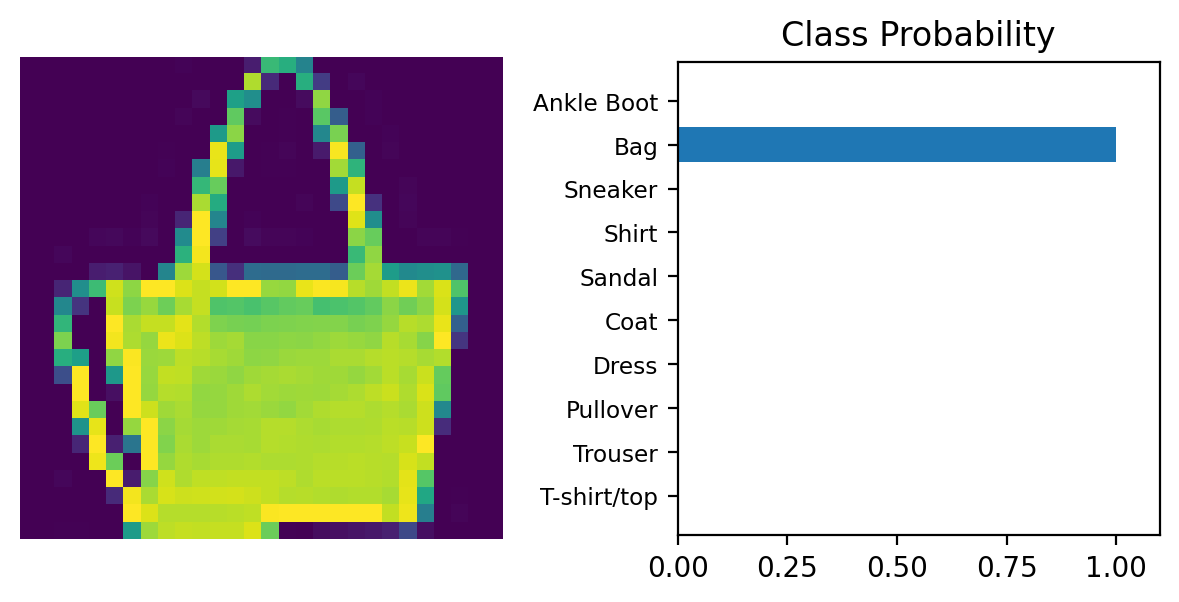

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img)) 
# Alternatively; ps torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')